In [1]:
import numpy as np
import matplotlib.pyplot as plt

# problem 1

## (a)

In [2]:
# Implement the tridiagonal solver seen in class.

def trisolve(A, b):
    """
    solve a linear system Ax = b where A is a tridiagonal matrix
    
    Inputs:
        A: 2D array, n-by-3, each column represents a diagonal with 
            indices (-1,0,1)
        b: 1D array, n, ordinate
        
    Output:
        solution, 1D array, n
    """    
    n = len(b)
    A = np.array(A, dtype='double')
    b = np.array(b, dtype='double')
    
    for i in range(n-1):
        A[i,0] = A[i,0]/A[i,1]
        A[i+1,1] = A[i+1,1]-A[i,0]*A[i,2]
    
    for i in range(1, n):
        b[i] = b[i]-A[i-1,0]*b[i-1]
    
    b[n-1] = b[n-1]/A[n-1,1]
    for i in range(n-2,-1,-1):
        b[i] = (b[i]-A[i,2]*b[i+1])/A[i,1]
   
    return b

## (b)

In [3]:
# Test our implementation.

A = np.array([[2,1,0,0],
              [1,4,6,0],
              [0,2,4,1],
              [0,0,2,2]])
b = np.array([2,1,2,1])
# solve by the standrad package
print('exact solution:', np.linalg.solve(A, b))

At = np.zeros((A.shape[0],3))
At[:-1,0] = np.diag(A,-1)
At[:,1] = np.diag(A,0)
At[:-1,2] = np.diag(A,1)
# solve by our implementation
print('our implementation:', trisolve(At, b))

exact solution: [-2.   6.  -3.5  4. ]
our implementation: [-2.   6.  -3.5  4. ]


Our implementation is correct.

# problem 2

## (a)

Use your use your tridiagonal solver to solve (2) for $N = 50$ and plot your corresponding solution.

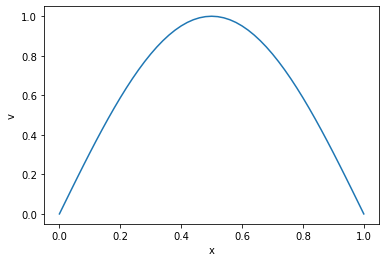

In [4]:
N_a = 50  # N, the subscript `a` represents part (a) of the question 
h_a = 1/N_a

x_a = np.linspace(0,1,N_a+1)
v_a = np.zeros_like(x_a, dtype='double')

# build this linear system 
At = np.zeros((N_a-1, 3))
At[:-1,0] = -1/h_a**2*np.ones(N_a-2)
At[:,1] = (2/h_a**2+np.pi**2)*np.ones(N_a-1)
At[:-1,2] = -1/h_a**2*np.ones(N_a-2)
b = 2*np.pi**2*np.sin(np.pi*x_a[1:N_a])

# solve the linear system
v_a[1:N_a] = trisolve(At, b)

# do a plot
plt.figure()
plt.plot(x_a, v_a)
plt.xlabel('x')
plt.ylabel('v')

plt.show()

## (b)

The exact solution to the boundary value problem (1) is $u(x) = \sin(\pi x)$. Check this.

Since
$$
\begin{aligned}
-u''+\pi^2 u&=-(\sin(\pi x))''+\pi^2 \sin(\pi x)\\
&=2\pi^2 \sin(\pi x)
\end{aligned}
$$
and $\sin(\pi 0)=\sin(\pi 1)=0$, $u(x)=\sin(\pi x)$ is the solution to this problem.

## (c)

Compute the error of your approximation in the 2-norm for $N = 50$. Solve again (2) for $N = 100$, by how much would you expect the error to decrease? verify your answer by comparing the error for $N = 50$ and $N = 100$.

In [5]:
# compute the error of your approximation in the 2-norm for N = 50
err_a = np.linalg.norm(v_a-np.sin(np.pi*x_a),2)
print('error for N = %d is'%N_a, err_a)

N_c = 100  # N, the subscript `c` represents part (c) of the question 
h_c = 1/N_c

x_c = np.linspace(0,1,N_c+1)
v_c = np.zeros_like(x_c, dtype='double')

# build this linear system 
At = np.zeros((N_c-1, 3))
At[:-1,0] = -1/h_c**2*np.ones(N_c-2)
At[:,1] = (2/h_c**2+np.pi**2)*np.ones(N_c-1)
At[:-1,2] = -1/h_c**2*np.ones(N_c-2)
b = 2*np.pi**2*np.sin(np.pi*x_c[1:N_c])

# solve the linear system
v_c[1:N_c] = trisolve(At, b)

# compute the error of your approximation in the 2-norm for N = 100
err_c = np.linalg.norm(v_c-np.sin(np.pi*x_c),2)
print('error for N = %d is'%N_c, err_c)

error for N = 50 is 0.0008224940857685608
error for N = 100 is 0.00029078839951571505


The error we expect is approximately $O(h^{\alpha})$, $\alpha=2$.

In [6]:
print('alpha is', np.log(err_c/err_a)/np.log(N_a/N_c))

alpha is 1.5000355883713066


Note the computed $\alpha$ is approximately $1.5$. This is because we calculate the error in 2-norm. If we calculate the error in max-norm, then we will get $\alpha=2$.

## (d)

In real applications we do not know the exact solution. Describe a process to check the convergence and rate of convergence of your approximation if you don't know the exact solution.

Compute the approximations for $N,2N,4N$ for fix $N$. Then compute the norm of vector $\frac{v_{N}-v_{2N}}{v_{2N}-v_{4N}}$ where $v_{N},v_{2N},v_{4N}$ are numerical results for different number of grid points at same node $x$. Then 
$$
2^{\alpha} \approx  \left\|\frac{v_{N}-v_{2N}}{v_{2N}-v_{4N}} \right\|
$$
where $\alpha$ is the rate of convergence.

# problem 3

## (a)

Do the first two iterations of Jacobi.

Jacobi's iteration for this system is
$$
\begin{aligned}
x_1^{(k+1)}=&2x_2^{(k)}-x_3^{(k)}-1\\
x_2^{(k+1)}=&-2x_1^{(k)}+3x_3^{(k)}+3\\
x_3^{(k+1)}=&-x_1^{(k)}+x_2^{(k)}\\
\end{aligned}
$$
Starting with $x^{(0)}=[0,0,0]^{T}$, we obtain
$$
x^{(1)}=\begin{bmatrix}
-1\\3\\0
\end{bmatrix},\quad
x^{(2)}=\begin{bmatrix}
5\\5\\4
\end{bmatrix}
$$


## (b)

Do the first two iterations of Gauss-Seidel.

Gauss-Seidel's iteration for this system is
$$
\begin{aligned}
x_1^{(k+1)}&=2x_2^{(k)}-x_3^{(k)}-1\\
x_2^{(k+1)}&=-2x_1^{(k+1)}+3x_3^{(k)}+3\\
x_3^{(k+1)}&=-x_1^{(k+1)}+x_2^{(k+1)}\\
\end{aligned}
$$
Starting with $x^{(0)}=[0,0,0]^{T}$, we obtain
$$
x^{(1)}=\begin{bmatrix}
-1\\5\\6
\end{bmatrix},\quad
x^{(2)}=\begin{bmatrix}
3\\15\\12
\end{bmatrix}
$$


## (c)

Which of the two approximations is closer to the exact solution $(1,1,0)$?

The error of first two iterations of Jacobi in 2-norm are $\|e^{(1)}\|_2\approx 2.828$, $\|e^{(2)}\|_2\approx 6.9282$. And the error of first two iterations of Gauss-Seidel in 2-norm are $\|e^{(1)}\|_2\approx 7.4833$, $\|e^{(2)}\|_2\approx 18.5472$. So for first two iterations, the approximation given by the Jacobi is closer to the exact solution.

# problem 4

The iteration matrix of Jacobi for this system is
$$
T_{jacobi}=\begin{pmatrix}
2&0&0\\
0&2&0\\
0&0&2
\end{pmatrix}^{-1}\begin{pmatrix}
0&1&-1\\
-2&0&-2\\
1&1&0
\end{pmatrix}=\begin{pmatrix}
0&1/2&-1/2\\
-1&0&-1\\
1/2&1/2&0
\end{pmatrix}
$$
Compute the eigenvalues
$$
\det(T_{jacobi}-\lambda I)=-\lambda(\lambda^2+5/4)
$$
Then we see that the eigenvalues are $0,\pm i\sqrt{5/4}$, and the spectral radius of the Jacobi iteration matrix is
$$
\rho(T_{jacobi})=\sqrt{5/4}>1
$$
Thus Jacobi method diverges for this system. The iteration matrix of Gauss-Seidel for this system is

$$
T_{gauss-seidel}=\begin{pmatrix}
2&0&0\\
2&2&0\\
-1&-1&2
\end{pmatrix}^{-1}\begin{pmatrix}
0&1&-1\\
0&0&-2\\
0&0&0
\end{pmatrix}=\begin{pmatrix}
1/2&0&0\\
-1/2&1/2&0\\
0&1/4&1/2
\end{pmatrix}\begin{pmatrix}
0&1&-1\\
0&0&-2\\
0&0&0
\end{pmatrix}=\begin{pmatrix}
0&1/2&-1/2\\
0&-1/2&-1/2\\
0&0&-1/2
\end{pmatrix}
$$
Compute the eigenvalues
$$
T_{gauss-seidel}= -\lambda (\lambda + 1/2)^2
$$
Then we see that the eigenvalues are $0,-1/2$, and the spectral radius of the Gauss-Seidel iteration matrix is
$$
\rho(T_{gauss-seidel})=1/2<1
$$
Thus Gauss-Seidel method converges for this system.